In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import pickle
import pprint
from matplotlib.cbook import boxplot_stats
pp = pprint.PrettyPrinter(depth=6)
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 150)

In [2]:
csv_folder = "../../csv"

### Builds

In [9]:
builds = pd.read_csv(f"{csv_folder}/allBuilds.csv", index_col=0)
builds["finished_at"] = pd.to_datetime(builds.finished_at)
builds["started_at"] = pd.to_datetime(builds.started_at)
builds

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed
1,6994,NaN,99100662,push,2015-12-28 14:36:03+00:00,NaN,2015-12-28 14:18:30+00:00,5953.0,passed
2,6993,NaN,99093472,push,2015-12-28 13:27:51+00:00,NaN,2015-12-28 13:11:39+00:00,5166.0,passed
3,6992,NaN,99086186,push,2015-12-28 12:18:41+00:00,NaN,2015-12-28 12:10:56+00:00,5243.0,passed
4,6991,NaN,99078711,push,2015-12-28 10:56:34+00:00,NaN,2015-12-28 10:41:16+00:00,5045.0,passed
...,...,...,...,...,...,...,...,...,...
126,12162,1121.0,148002763,pull_request,2016-07-28 11:22:06+00:00,Provide WS to manage project links,2016-07-28 10:59:31+00:00,1431.0,passed
127,12163,NaN,148005346,push,2016-07-28 11:33:17+00:00,NaN,2016-07-28 11:13:59+00:00,1232.0,passed
128,12164,1121.0,148005355,pull_request,2016-07-28 11:34:11+00:00,Provide WS to manage project links,2016-07-28 11:14:09+00:00,1279.0,passed
129,12165,1121.0,148010751,pull_request,2016-07-28 12:02:21+00:00,Provide WS to manage project links,2016-07-28 11:41:56+00:00,1338.0,passed


In [20]:
jobs = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)
jobs

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
0,241946101,241946099,2017-06-12T09:21:03Z,2017-06-12T09:13:51.063Z,2017-06-12T09:21:43Z,25614.1,canceled,2018-06-02T14:51:19.734Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
1,241946103,241946099,2017-06-12T09:22:43Z,2017-06-12T09:13:51.107Z,2017-06-12T09:21:43Z,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
2,241952024,241952022,2017-06-12T09:36:43Z,2017-06-12T09:32:52.227Z,2017-06-12T09:37:23Z,25615.1,canceled,2018-06-02T14:51:25.661Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
3,241952025,241952022,NaN,2017-06-12T09:32:52.237Z,2017-06-12T09:37:24Z,25615.2,canceled,2018-06-02T14:51:25.669Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
4,241952045,241952044,2017-06-12T09:42:16Z,2017-06-12T09:32:59.994Z,2017-06-12T09:53:48Z,25616.1,passed,2018-06-02T14:51:26.125Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136978,315411337,315411335,2017-12-12T15:23:15Z,2017-12-12T15:22:41.091Z,2017-12-12T15:26:39Z,34811.2,passed,2018-06-03T16:57:36.971Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...
136979,315421139,315421138,2017-12-12T15:43:05Z,2017-12-12T15:42:34.642Z,2017-12-12T15:44:59Z,34812.1,passed,2018-06-03T16:57:47.762Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136980,315421140,315421138,2017-12-12T15:43:26Z,2017-12-12T15:42:34.682Z,2017-12-12T15:44:25Z,34812.2,passed,2018-06-03T16:57:47.778Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136981,315421147,315421146,2017-12-12T15:43:25Z,2017-12-12T15:42:40.583Z,2017-12-12T16:01:05Z,34813.1,passed,2018-06-03T16:57:47.837Z,a5005e0ca38a67e7d70c255154990ed10be31020,93645838,SONAR-10187 Provide more options to populate e...,refs/pull/2895/merge,https://github.com/SonarSource/sonarqube/pull/...


### Parsing

In [11]:
parsing = pd.read_csv(f"{csv_folder}/buildlog-data-travis.csv")
parsing.head()

,tr_build_id,tr_job_id,tr_build_number,tr_original_commit,tr_log_lan,tr_log_status,tr_log_setup_time,tr_log_analyzer,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_num_test_suites_run,tr_log_num_test_suites_ok,tr_log_num_test_suites_failed,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration
0,NaN,NaN,54731126,NaN,java,broken,4.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0
1,NaN,NaN,54731127,NaN,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
2,NaN,NaN,54734501,NaN,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0
3,NaN,NaN,54734502,NaN,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0
4,NaN,NaN,54738300,NaN,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0


In [10]:
parsing.shape

(11430, 21)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


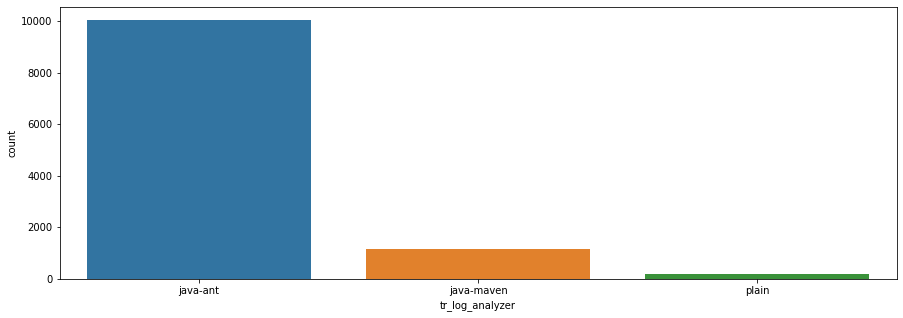

In [34]:
plt.figure()
sns.countplot(parsing.tr_log_analyzer)
plt.savefig("../../figures/travis-log-parsing/tr_log_analyzer.png", transparent=True, bbox_inches='tight', pad_inches=0.2)

In [24]:
parsing_state = parsing[["tr_build_number", "tr_log_status"]].merge(jobs[["id", "state"]], left_on="tr_build_number", right_on="id")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

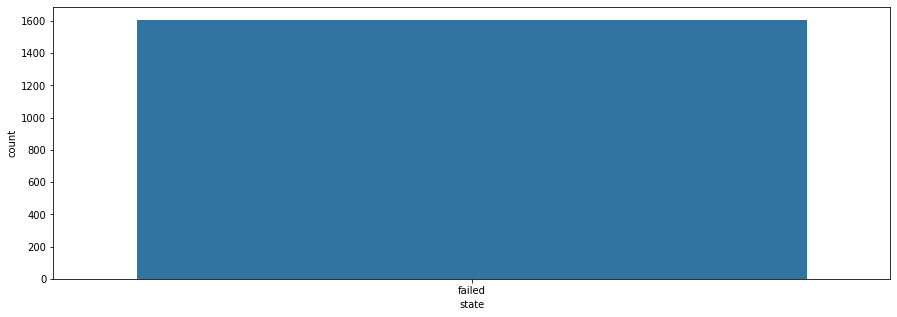

In [25]:
sns.countplot(parsing_state[parsing_state.tr_log_status == "broken"].state)

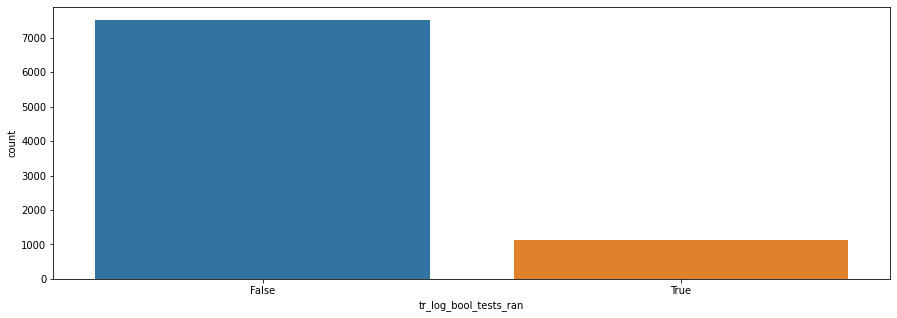

In [33]:
plt.figure()
sns.countplot(x=parsing[parsing.tr_log_status == "ok"].tr_log_bool_tests_ran)
plt.savefig("../../figures/travis-log-parsing/tr_log_bool_tests_ran.png", transparent=True, bbox_inches='tight', pad_inches=0.2)

In [41]:
parsing[parsing.tr_log_status == "ok"].tr_log_bool_tests_ran.value_counts(normalize=True)

False    0.869832
True     0.130168
Name: tr_log_bool_tests_ran, dtype: float64

In [29]:
parsing[(parsing.tr_log_status == "ok") & (~parsing.tr_log_bool_tests_ran)]

,tr_build_id,tr_job_id,tr_build_number,tr_original_commit,tr_log_lan,tr_log_status,tr_log_setup_time,tr_log_analyzer,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_num_test_suites_run,tr_log_num_test_suites_ok,tr_log_num_test_suites_failed,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration
539,NaN,NaN,56898572,NaN,java,ok,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779.0
542,NaN,NaN,56912580,NaN,java,ok,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746.0
544,NaN,NaN,56930923,NaN,java,ok,13.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.0
545,NaN,NaN,56936198,NaN,java,ok,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767.0
549,NaN,NaN,56948524,NaN,java,ok,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422,NaN,NaN,73512624,NaN,java,ok,4.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0
11426,NaN,NaN,73512658,NaN,java,ok,0.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11427,NaN,NaN,73512659,NaN,java,ok,0.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0
11428,NaN,NaN,73512660,NaN,java,ok,0.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0


In [40]:
parsing[(parsing.tr_log_status == "ok") & (parsing.tr_log_bool_tests_ran)].tr_log_analyzer.value_counts(normalize=True)

java-maven    0.991993
java-ant      0.008007
Name: tr_log_analyzer, dtype: float64

In [37]:
parsing[(parsing.tr_log_status == "ok") & (parsing.tr_log_bool_tests_ran)& (parsing.tr_log_analyzer == "java-ant")]

,tr_build_id,tr_job_id,tr_build_number,tr_original_commit,tr_log_lan,tr_log_status,tr_log_setup_time,tr_log_analyzer,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_num_test_suites_run,tr_log_num_test_suites_ok,tr_log_num_test_suites_failed,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration
8929,NaN,NaN,72291271,NaN,java,ok,4.0,java-ant,junit,True,False,6.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,48.68,126.0
8930,NaN,NaN,72291272,NaN,java,ok,4.0,java-ant,junit,True,False,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,62.47,205.0
8931,NaN,NaN,72291273,NaN,java,ok,3.0,java-ant,junit,True,False,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,49.08,136.0
8932,NaN,NaN,72291274,NaN,java,ok,4.0,java-ant,junit,True,False,13.0,0.0,13.0,0.0,NaN,NaN,NaN,NaN,86.21,168.0
9199,NaN,NaN,72337735,NaN,java,ok,4.0,java-ant,junit,True,False,6.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,58.19,136.0
9200,NaN,NaN,72337736,NaN,java,ok,4.0,java-ant,junit,True,False,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,66.15,201.0
9201,NaN,NaN,72337737,NaN,java,ok,4.0,java-ant,junit,True,False,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,47.31,123.0
9202,NaN,NaN,72337738,NaN,java,ok,4.0,java-ant,junit,True,False,13.0,0.0,13.0,0.0,NaN,NaN,NaN,NaN,68.45,150.0
9203,NaN,NaN,72337739,NaN,java,ok,4.0,java-ant,junit,True,False,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,190.88,273.0


In [42]:
parsing[(parsing.tr_log_status == "ok") & (parsing.tr_log_bool_tests_ran)& (parsing.tr_log_analyzer == "java-maven")]

,tr_build_id,tr_job_id,tr_build_number,tr_original_commit,tr_log_lan,tr_log_status,tr_log_setup_time,tr_log_analyzer,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_num_test_suites_run,tr_log_num_test_suites_ok,tr_log_num_test_suites_failed,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration
639,NaN,NaN,57446687,NaN,java,ok,0.0,java-maven,junit,True,False,6447.0,0.0,6447.0,0.0,NaN,NaN,NaN,NaN,580.57,NaN
663,NaN,NaN,57481242,NaN,java,ok,0.0,java-maven,junit,True,False,6451.0,0.0,6451.0,0.0,NaN,NaN,NaN,NaN,490.24,NaN
666,NaN,NaN,57481639,NaN,java,ok,0.0,java-maven,junit,True,False,6451.0,0.0,6451.0,0.0,NaN,NaN,NaN,NaN,503.89,NaN
669,NaN,NaN,57485879,NaN,java,ok,0.0,java-maven,junit,True,False,6454.0,0.0,6454.0,0.0,NaN,NaN,NaN,NaN,519.54,NaN
677,NaN,NaN,57495509,NaN,java,ok,0.0,java-maven,junit,True,False,6451.0,0.0,6451.0,0.0,NaN,NaN,NaN,NaN,524.16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,NaN,NaN,73512240,NaN,java,ok,4.0,java-maven,junit,True,False,460.0,0.0,460.0,23.0,NaN,NaN,NaN,NaN,28.98,62.0
11413,NaN,NaN,73512615,NaN,java,ok,4.0,java-maven,junit,True,False,460.0,0.0,460.0,23.0,NaN,NaN,NaN,NaN,34.27,62.0
11414,NaN,NaN,73512616,NaN,java,ok,4.0,java-maven,junit,True,False,460.0,0.0,460.0,23.0,NaN,NaN,NaN,NaN,60.82,88.0
11424,NaN,NaN,73512656,NaN,java,ok,0.0,java-maven,junit,True,False,460.0,0.0,460.0,23.0,NaN,NaN,NaN,NaN,35.52,64.0
